In [26]:
# NumPy for numerical computing
import numpy as np
# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
import matplotlib.pyplot as plt
# display plots in the notebook
%matplotlib inline
# Seaborn for easier visualization
import seaborn as sns

In [27]:
data = pd.read_csv('../input/hr-data/HR_comma_sep.csv')

In [28]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<span id="drop"></span>
## Data preprocessing

In [29]:
# Unique classes of 'department'
data.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [30]:
# check for missing values
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

The data features has no missing values

In [31]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [32]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [33]:
attrition = data.left.value_counts() / len(data)
attrition

0    0.761917
1    0.238083
Name: left, dtype: float64

Only 23% employee left job Data need to be properly distributed for training purpose.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


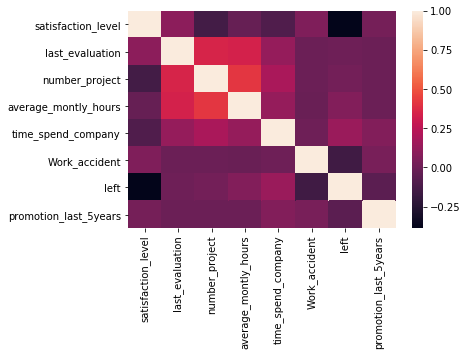

In [34]:
#Heatmap to find the correlation between features
heatmap = data.corr()
sns.heatmap(heatmap,  xticklabels=heatmap.columns.values, yticklabels=heatmap.columns.values)
heatmap


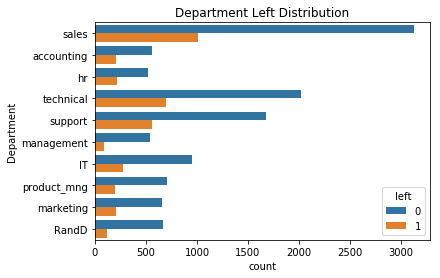

In [35]:
sns.countplot( hue='left',y="Department", data=data).set_title('Department Left Distribution');

Most people left from Sales , technical and support department

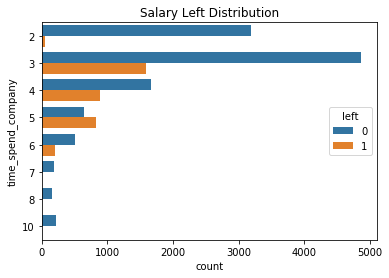

In [36]:
sns.countplot( hue='left',y="time_spend_company", data=data).set_title('Salary Left Distribution');

Most people left when they have been in Company 3-5 years. Above that it seems it became their family

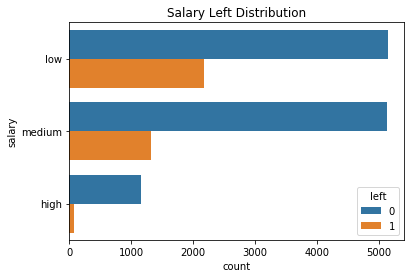

In [37]:
sns.countplot( hue='left',y="salary", data=data).set_title('Salary Left Distribution');

People with High salary tend to leave less than people with Low Salary


<span id="engineer-features"></span>

## Engineer features

These roughly translate to 3 **indicator features** we can engineer:

* <code style="color:steelblue">'underperformer'</code> - last_evaluation < 0.6
* <code style="color:steelblue">'unhappy'</code> - satisfaction_level < 0.4
* <code style="color:steelblue">'overachiever'</code> - last_evaluation > 0.8 and satisfaction > 0.7

In [38]:
# Create indicator features
data['underperformer'] = (data.last_evaluation < 0.6).astype(int)
data['unhappy'] = (data.satisfaction_level < 0.4).astype(int)
data['overachiever'] = ((data.last_evaluation > 0.8) & (data.satisfaction_level > 0.7)).astype(int)

In [39]:
# The proportion of observations belonging to each group
data[['underperformer', 'unhappy', 'overachiever']].mean()

underperformer    0.316154
unhappy           0.194346
overachiever      0.186212
dtype: float64

In [40]:
# Create new dataframe with dummy features
add_columns = data.select_dtypes(include=['object']).columns
dummy_table = pd.get_dummies(data, columns=add_columns)
# Display first 10 rows
pd.set_option('display.max_columns', 50)
dummy_table.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,underperformer,unhappy,overachiever,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


## Model Training
<span id=training><span>

In [41]:
# Pickle for saving model files
import pickle

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
# Function for splitting training and test set
from sklearn.model_selection import train_test_split
# For standardization
from sklearn.preprocessing import StandardScaler
# Classification metrics (added later)
from sklearn.metrics import roc_curve, auc

#### Split the data

In [42]:
# Create separate object for target variable
y = dummy_table.left

# Create separate object for input features
X = dummy_table.drop('left', axis=1)

In [43]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.2,
                                                    random_state=1234,
                                                    stratify=dummy_table.left)

# Print number of observations in X_train, X_test, y_train, and y_test
print(len(X_train), len(X_test), len(y_train), len(y_test))

11999 3000 11999 3000


Scaling has not been done to keep the model simple, since predictions are done for single input observation. But scaling is required for making a model which can give credible predictions

In [44]:
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
model=rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))



 ---Random Forest Model---
Random Forest AUC = 0.98
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.96      0.97       714

   micro avg       0.99      0.99      0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



<span id="evaluate"></span>
## Evaluate metrics

In [ ]:
# Classification metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [ ]:
pred = model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, pred))

In [ ]:
pred_prob = model.predict_proba(X_test)

pred_prob = [p[1] for p in pred_prob]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)

# Initialize figure
plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Calculate AUROC
print(auc(fpr, tpr))

In [ ]:
# Save winning model as final_model.pkl
with open('final_model.pkl', 'wb') as f:
    pickle.dump(model, f)

#### Reading the pickle file to get the stored model to perform predictions and calculate auc

In [ ]:
objects = []
with open('final_model.pkl', 'rb') as f:
    objects.append(pickle.load(f))

In [ ]:
pred = objects[0].predict_proba(X_test)
pred = [p[1] for p in pred]

fpr, tpr, threshold = roc_curve(y_test, pred)
print(auc(fpr, tpr)) 

The score matches the previous AUROC score, the model was saved into pickle file correctly and can be used for making predictions